Confusion Matrix:
 [[71  1]
 [ 3 39]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

ROC-AUC Score: 0.9960


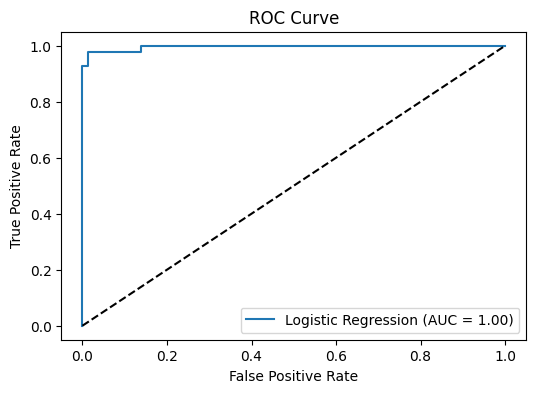

In [4]:
# --- Import Libraries ---
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

# --- 1. Load and prepare data ---
df = pd.read_csv("/content/archive (3).zip")  # replace with your path if needed

# Remove unnecessary columns
df = df.drop(columns=["id", "Unnamed: 32"], errors='ignore')

# Encode target: M = 1, B = 0
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})

# Separate features and target
X = df.drop(columns=["diagnosis"])
y = df["diagnosis"]

# --- 2. Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- 3. Standardize features ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- 4. Fit Logistic Regression ---
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# --- 5. Predictions ---
y_pred = log_reg.predict(X_test_scaled)
y_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

# --- 6. Evaluation ---
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# --- 7. ROC Curve ---
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


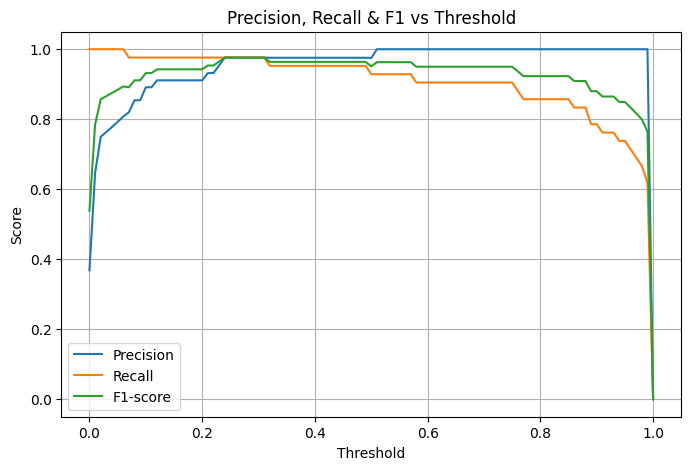

Best Threshold by F1: 0.24
Confusion Matrix:
 [[71  1]
 [ 1 41]]


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Assuming y_test and y_proba (predicted probabilities for positive class) already exist
# y_proba should be: model.predict_proba(X_test)[:, 1]

thresholds = np.linspace(0, 1, 101)
precisions, recalls, f1s = [], [], []

for t in thresholds:
    y_pred_t = (y_proba >= t).astype(int)
    precisions.append(precision_score(y_test, y_pred_t))
    recalls.append(recall_score(y_test, y_pred_t))
    f1s.append(f1_score(y_test, y_pred_t))

# Plot Precision, Recall, F1 vs Threshold
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precisions, label="Precision")
plt.plot(thresholds, recalls, label="Recall")
plt.plot(thresholds, f1s, label="F1-score")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision, Recall & F1 vs Threshold")
plt.legend()
plt.grid(True)
plt.show()

# Best threshold based on F1
best_t = thresholds[np.nanargmax(f1s)]
print(f"Best Threshold by F1: {best_t:.2f}")

# Confusion Matrix at best threshold
print("Confusion Matrix:\n", confusion_matrix(y_test, (y_proba >= best_t).astype(int)))
